In [68]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii

%matplotlib inline

In [76]:
cat_file='/Volumes/Media/Data/NGVS/catalogs/match_v7/ngvs_match_ir_optical_value_added.fits'
hdu = fits.open(cat_file)
hdu.info()

Filename: /Volumes/Media/Data/NGVS/catalogs/match_v7/ngvs_match_ir_optical_value_added.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (3218,)      uint8   
1    Joined      BinTableHDU     87   232317R x 29C   [J, D, D, E, E, E, E, E, E, E, E, I, J, E, J, 5D, 5D, 5D, 5D, 5E, 5E, 5E, 5E, 5E, 5I, 5E, E, D, L]   


In [77]:
cat_data=hdu[1].data
cat_data.columns

ColDefs(
    name = 'NUMBER'; format = 'J'; null = -2147483648
    name = 'ALPHA_J2000_1'; format = 'D'; unit = 'deg'
    name = 'DELTA_J2000_1'; format = 'D'; unit = 'deg'
    name = 'MAG_PSF_1'; format = 'E'; unit = 'mag'
    name = 'MAGERR_PSF_1'; format = 'E'; unit = 'mag'
    name = 'MAG_AUTO_1'; format = 'E'; unit = 'mag'
    name = 'MAGERR_AUTO_1'; format = 'E'; unit = 'mag'
    name = 'FLUX_RADIUS_1'; format = 'E'; unit = 'pixel'
    name = 'CLASS_STAR_1'; format = 'E'
    name = 'A_IMAGE'; format = 'E'; unit = 'pixel'
    name = 'B_IMAGE'; format = 'E'; unit = 'pixel'
    name = 'FLAGS_1'; format = 'I'; null = -32768
    name = 'IMAFLAGS_ISO'; format = 'J'; null = -2147483648
    name = 'SWARP_WEIGHT'; format = 'E'; unit = 'ADU'
    name = 'ID_NUMBER'; format = 'J'
    name = 'ALPHA_J2000_2'; format = '5D'
    name = 'DELTA_J2000_2'; format = '5D'
    name = 'A_WORLD'; format = '5D'
    name = 'B_WORLD'; format = '5D'
    name = 'MAG_AUTO_2'; format = '5E'
    name = 'MAGERR_A

In [115]:
g=cat_data['MAG_AUTO_2'][:,1]
i=cat_data['MAG_AUTO_2'][:,3]
z=cat_data['MAG_AUTO_2'][:,4]
K=cat_data['MAG_AUTO_1']+1.827
K_err=cat_data['MAGERR_AUTO_1']
star_uiK=cat_data['star_uiK']

gv=((g<99) & (i<99) & (z<99) & (K<99) & (K_err<0.04))
gv_stars=(gv & star_uiK)

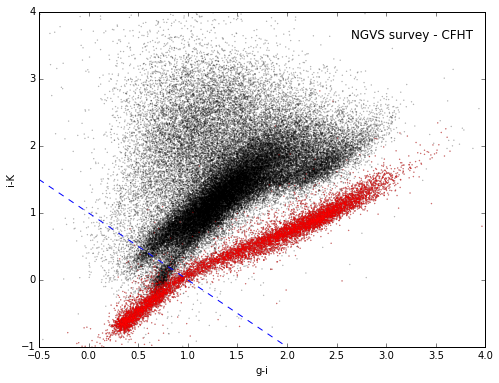

In [116]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter((g-i)[gv],(i-K)[gv], 2, c='black', marker='o', alpha=0.3, label='all', edgecolors='none', rasterized=True)
plt.scatter((g-i)[gv_stars],(i-K)[gv_stars], 2, c='red', marker='o', alpha=0.4, label='all', edgecolors='none', rasterized=True)

plt.xlim(-0.5,4)
plt.ylim(-1,4)
plt.xlabel('g-i')
plt.ylabel('i-K')
plt.text(0.7,0.95,'NGVS survey - CFHT', transform=ax.transAxes, verticalalignment='top', fontsize=12)

x=np.arange(-1,5,1)
y=1-x
plt.plot(x,y,'--',c='blue')

fig.savefig('NGVS_giK_diagram.pdf', dpi=150)

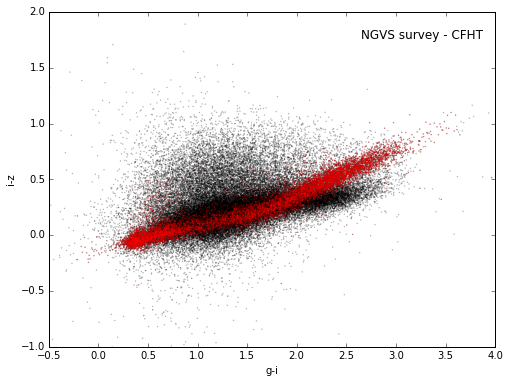

In [118]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter((g-i)[gv],(i-z)[gv], 2, c='black', marker='o', alpha=0.3, label='all', edgecolors='none', rasterized=True)
plt.scatter((g-i)[gv_stars],(i-z)[gv_stars], 2, c='red', marker='o', alpha=0.3, label='all', edgecolors='none', rasterized=True)
plt.xlim(-0.5,4)
plt.ylim(-1,2)
plt.xlabel('g-i')
plt.ylabel('i-z')
plt.text(0.7,0.95,'NGVS survey - CFHT', transform=ax.transAxes, verticalalignment='top', fontsize=12)
fig.savefig('NGVS_giz_diagram.pdf', dpi=150)